____
# Modul 0



## *Flyttal, Machine epsilon, kanceleringsfel*


### *Print machine epsilon:*

In [36]:
import numpy as np

machine_epsilon = np.finfo(float).eps
print (machine_epsilon)

2.220446049250313e-16


## Show cancellation error


In [37]:
h = 1.0e-12

def f(x):
    return np.sqrt(x)

print(f'f(2+h) = {f(2+h)}')
print(f'\n f(2) = {f(2)}')

f(2+h) = 1.4142135623734486

 f(2) = 1.4142135623730951


### Differenskvoten jmf. med exakt värde:

In [38]:

Differenskvot = (f(2+h) - f(2)) / h
Exakt = 1/2/np.sqrt(2)
diff = Differenskvot - Exakt

print(f'Differenskvot = {Differenskvot}')
print(f'Exakt = {Exakt}')
print(f'Diff = {diff}')


Differenskvot = 0.35349501104064984
Exakt = 0.35355339059327373
Diff = -5.837955262388839e-05


Skriv om mha algebra för att få derivatan som:

In [39]:
Diffkvot_refined = 1 / (f(2+h) + f(2))
ny_diff = Diffkvot_refined - Exakt

print(f'Diff = {ny_diff}')



Diff = -4.418687638008123e-14


___
# *Modul 1*


### Enkelt matplotlib exempel. 
Jag gillade speciellt att göra en "rita funktion"


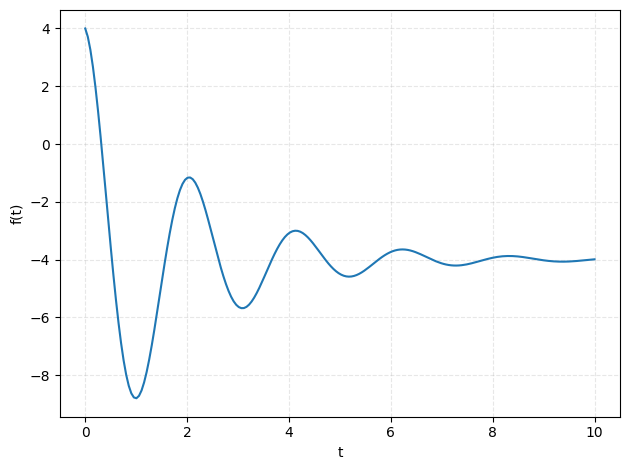

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def draw(f: Callable, a: float, b: float, n: int, xlabel: str, ylabel: str, keypoint_x: float = None, keypoint_y: float = None) -> None:
    """ Plots the function f on the interval [a, b] with n points.
    If keypoint_x and keypoint_y are provided, marks that point on the plot.
    """
    
    x = np.linspace(a, b, n)
    y = f(x)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    
    # plot settings
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    fig.tight_layout()

    if keypoint_x is not None and keypoint_y is not None:
        plt.plot(keypoint_x, keypoint_y, 'ro')  # mark the key point in red

    plt.show()

def main():
    def f(t):
        return 8*np.exp(-t/2)*np.cos(3*t)-4

    draw(f, 0, 10, 200, 't', 'f(t)')

if __name__ == '__main__':
    main()



## Bisection Method

In [41]:
from dataclasses import dataclass
from typing import Callable

def bisection(f: Callable, a: float, b: float, tolerance: float) \
    -> tuple[list, float]:
    
    """ Bisection method for finding a root of f in [a,b]
        Input:
            f: function
            a,b: interval endpoints
            tolerance: stopping criterion
        Output:
            c: approximate root
            k: number of iterations
            e_x: estimated error
    """

    @dataclass
    class Result:
        f: float
        c: float
        k: int


    # Check that f(a) and f(b) have different signs
    if f(a)*f(b) > 0:
        print('f(a) and f(b) has the same sign')

    Results = []

    k = 0
    DeltaX = tolerance + 1.0
    while DeltaX > tolerance:
        c = (a + b) / 2.0
        if f(a)*f(c) < 0:
            b = c # root element of [a,c]
        else:
            a = c # root element of [c,b]
        DeltaX = abs(b - a)
        k += 1
        Results.append(Result(f=f(c), c=c, k=k))
                       
    # Estimated error
    e_x = DeltaX / 2.0
    
    return Results, e_x

Låt f(x) = x - 4sin(2x) - 243/80. Beräkna approximativt en rot till f i närheten av x=3 och x=7
med bisection method med 6 korrekta decimaler.

  k             c           f(c)
---  ------------  -------------
  1  3.1000000000   0.3948576113
  2  3.1500000000   0.0452443981
  3  3.1750000000  -0.1295599661
  4  3.1625000000  -0.0422100344
  5  3.1562500000   0.0015080224
  6  3.1593750000  -0.0203537839
  7  3.1578125000  -0.0094235142
  8  3.1570312500  -0.0039578967
  9  3.1566406250  -0.0012249739
 10  3.1564453125   0.0001415152
 11  3.1565429688  -0.0005417316
 12  3.1564941406  -0.0002001088
 13  3.1564697266  -0.0000292969
 14  3.1564575195   0.0000561091
 15  3.1564636230   0.0000134061
 16  3.1564666748  -0.0000079454

Approximate root: 3.1564666748046886
Number of iterations: 16
Estimated error: 1.5258789063388178e-06


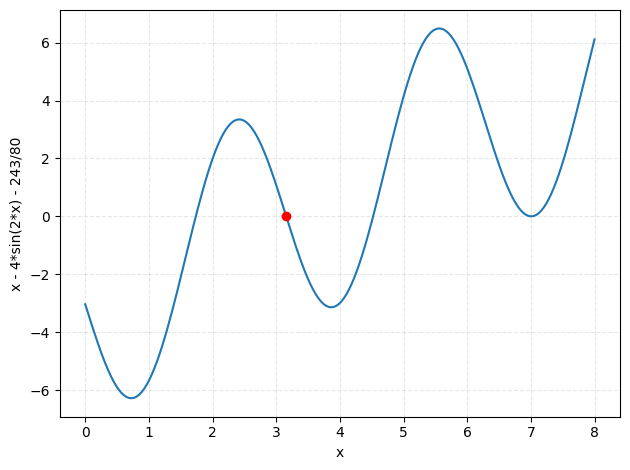

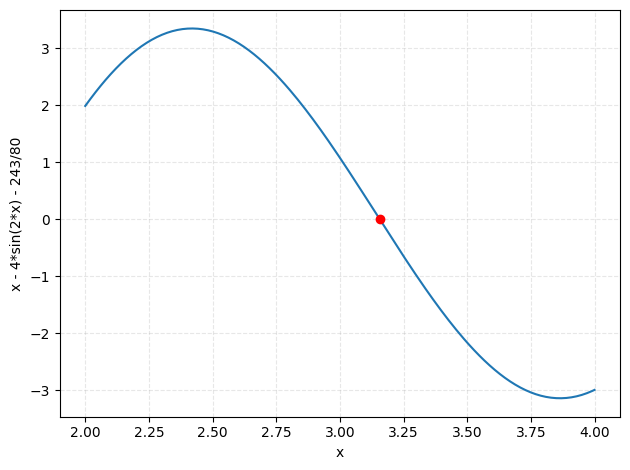

In [50]:
from tabulate import tabulate

def f(x) -> float:
    return x - 4*np.sin(2*x) - 243/80


Results, e_x = bisection(f, 3, 3.2, 0.5e-5 )
tabulate_data = [(res.k, res.c, res.f) for res in Results]

print(tabulate(tabulate_data, headers=['k', 'c', 'f(c)'], \
            stralign='center', numalign='right', floatfmt=".10f"))

iteration = Results[-1].k

print(f'\nApproximate root: {Results[-1].c}')
print(f'Number of iterations: {iteration}')
print(f'Estimated error: {e_x}')

draw(f, 0, 8, 200, 'x', 'x - 4*sin(2*x) - 243/80', keypoint_x=Results[-1].c, keypoint_y=f(Results[-1].c))
draw(f, 2, 4, 200, 'x', 'x - 4*sin(2*x) - 243/80', keypoint_x=Results[-1].c, keypoint_y=f(Results[-1].c))